In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
data = pd.read_csv('../dataset/data_9diagnosis.csv')
df = data.drop('Diagnosis', axis=1)

## Import TP SYO9

In [42]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    default_kwargs = dict(leaf_font_size=10)
    default_kwargs.update(kwargs or {})

    dendrogram(linkage_matrix, **default_kwargs)

## CAH

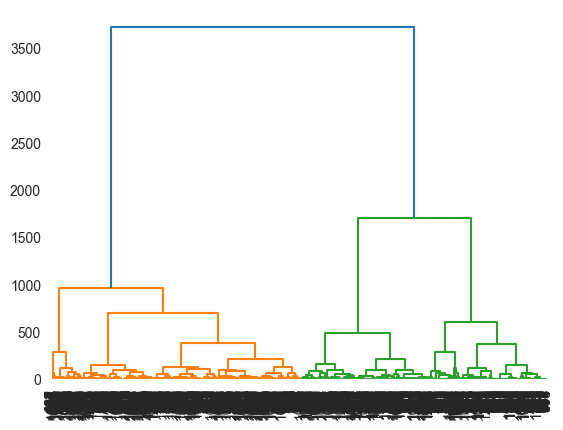

In [43]:
model = AgglomerativeClustering(linkage="ward",distance_threshold=0, n_clusters=None).fit(df)
plot_dendrogram(model)
plt.show()

## CAH moyenne diagnostics

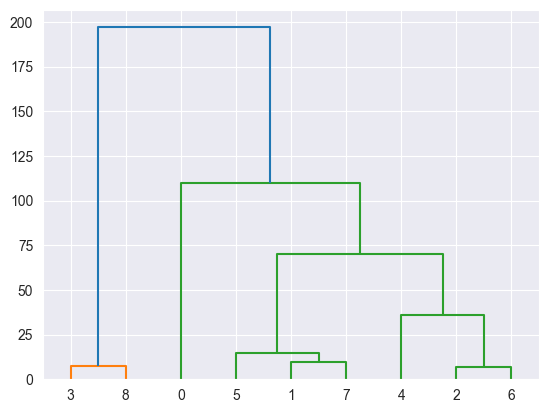

In [44]:
mean_diagnostics = data.groupby('Diagnosis').mean()
model = AgglomerativeClustering(linkage="ward",distance_threshold=0, n_clusters=None).fit(mean_diagnostics)
plot_dendrogram(model)
plt.show()

## Récuparation des centres de gravité des classes dans l'ACP

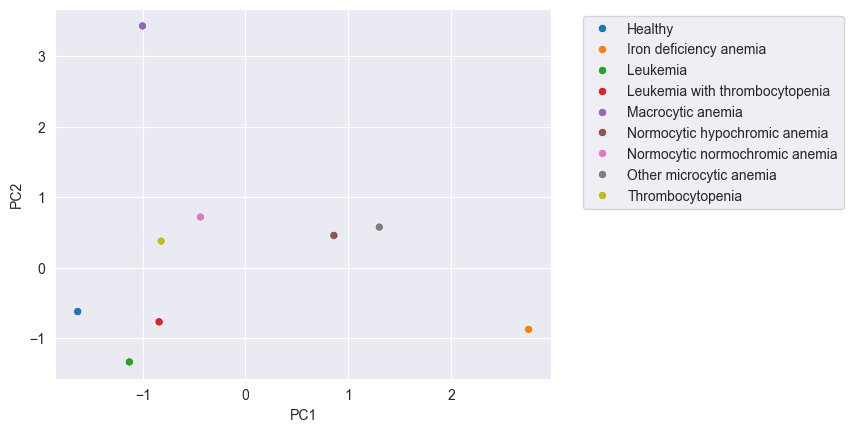

In [45]:
scaler = StandardScaler()
df_scale = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
pca = PCA(n_components=5)
pcs = pca.fit_transform(df_scale)
pca_df = pd.DataFrame(pcs,columns=[f"PC{i}" for i in range(1, 6)])
pca_df["Diagnosis"]=data.Diagnosis
pca_diagnostics = pca_df.groupby('Diagnosis').mean()
sns.scatterplot(x="PC1", y="PC2", hue="Diagnosis", data=pca_diagnostics)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## CAH classes ACP

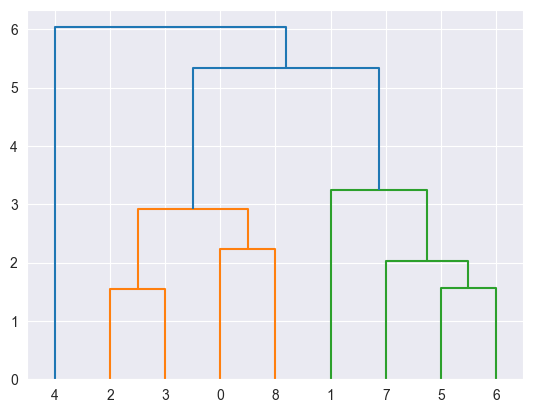

In [46]:
model = AgglomerativeClustering(linkage="ward",distance_threshold=0, n_clusters=None).fit(pca_diagnostics)
plot_dendrogram(model)
plt.show()